In [17]:
# Question 1/2
# Here we read in the data and modify for libsvm input format

# Using readlines()
file1 = open("abalone.txt", "r")
Lines = file1.readlines()

labels = []
data = []

X = []
y = []
# process data for libsvm input
for line in Lines:
    raw = line.strip().split(",")
    processed = []
    for index, v in enumerate(raw):
        # read last column as label
        if index == 8:
            val = -1
            if float(v) <= 9:
                val = 1
            y.append(val)
        # convert string class 3 binary cols
        elif v == "M":
            processed.append(1)
            processed.append(0)
            processed.append(0)
        elif v == "F":
            processed.append(0)
            processed.append(1)
            processed.append(0)
        elif v == "I":
            processed.append(0)
            processed.append(0)
            processed.append(1)
        else:
            processed.append(float(v))
    X.append(processed)


In [35]:
from sklearn import preprocessing
from sklearn.utils import shuffle

# split into train and test set
X_train, X_test = X[:3133], X[3133:]
y_train, y_test = y[:3133], y[3133:]

# fit a scaler to the test set
scaler = preprocessing.StandardScaler().fit(X_train)

# scale the training set
X_train = scaler.transform(X_train)

# scale the test set using same scaler from training set
X_test = scaler.transform(X_test)

# shuffle train data
X_train, y_train = shuffle(X_train, y_train, random_state=0)


In [19]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

TRange = [100*(i+1) for i in range(20)]

adaBestT = 0
adaBestAcc = 0
adaAccs = []
adaStds = []

# Adaboost
for T in TRange:
    
    # FROM DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    # paramters: 'loss' gives the loss function to be optimized.
    # 'deviance' refers to deviance (= logistic regression).
    # 'exponential' recovers the AdaBoost algorithm.
    # 'max_depth=1' for boosting stumps
    clf = GradientBoostingClassifier(n_estimators=T, loss='exponential', learning_rate=1.0, max_depth=1, random_state=0)
    
    # compute Tenfold cross validation scores (with different splits each time):
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    acc = scores.mean()
    std = scores.std()
    
    # record acc & std
    adaAccs.append(acc)
    adaStds.append(std)
    
    # record best params
    if acc > adaBestAcc:
        adaBestAcc = acc
        adaBestT = T
            
    print("T=%d, Accuracy: %0.4f, STD: %0.4f)" % (T, acc, std))

    
print("Best T for Adaboost: %d, with acc: %0.4f" % (adaBestT, adaBestAcc))

T=100, Accuracy: 0.7893, STD: 0.0154)
T=200, Accuracy: 0.7855, STD: 0.0194)
T=300, Accuracy: 0.7788, STD: 0.0206)
T=400, Accuracy: 0.7794, STD: 0.0208)
T=500, Accuracy: 0.7750, STD: 0.0247)
T=600, Accuracy: 0.7762, STD: 0.0209)
T=700, Accuracy: 0.7743, STD: 0.0176)
T=800, Accuracy: 0.7734, STD: 0.0166)
T=900, Accuracy: 0.7702, STD: 0.0156)
T=1000, Accuracy: 0.7711, STD: 0.0147)
T=1100, Accuracy: 0.7708, STD: 0.0150)
T=1200, Accuracy: 0.7705, STD: 0.0139)
T=1300, Accuracy: 0.7705, STD: 0.0128)
T=1400, Accuracy: 0.7721, STD: 0.0136)
T=1500, Accuracy: 0.7724, STD: 0.0133)
T=1600, Accuracy: 0.7724, STD: 0.0131)
T=1700, Accuracy: 0.7699, STD: 0.0147)
T=1800, Accuracy: 0.7689, STD: 0.0141)
T=1900, Accuracy: 0.7695, STD: 0.0139)
T=2000, Accuracy: 0.7689, STD: 0.0150)
Best T for Adaboost: 100, with acc: 0.7893


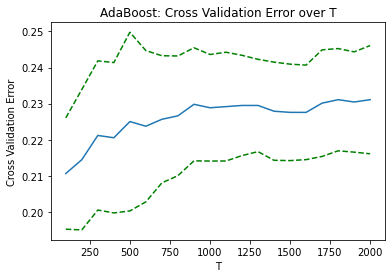

In [20]:
import matplotlib.pyplot as plt

err = [1 - adaAccs[i] for i in range(len(adaAccs))]
plt.plot(TRange, err)

above = [err[i] + adaStds[i] for i in range(len(err))]
plt.plot(TRange, above, "g--")

below = [err[i] - adaStds[i] for i in range(len(err))]
plt.plot(TRange, below, "g--")

plt.title("AdaBoost: Cross Validation Error over T")
plt.xlabel("T")
plt.ylabel("Cross Validation Error")
plt.show()

In [21]:
logicBestT = 0
logicBestAcc = 0
logicAccs = []
logicStds = []

# Logisitic Loss Boosting
for T in TRange:
    
    # FROM DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    # paramters: 'loss' gives the loss function to be optimized.
    # 'deviance' refers to deviance (= logistic regression).
    # 'exponential' recovers the AdaBoost algorithm.
    # 'max_depth=1' for boosting stumps
    clf = GradientBoostingClassifier(n_estimators=T, loss='deviance', learning_rate=1.0, max_depth=1, random_state=0)
    
    # compute Tenfold cross validation scores (with different splits each time):
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    acc = scores.mean()
    std = scores.std()
    
    # record acc & std
    logicAccs.append(acc)
    logicStds.append(std)
    
    # record best params
    if acc > logicBestAcc:
        logicBestAcc = acc
        logicBestT = T
            
    print("T=%d, Accuracy: %0.4f, STD: %0.4f)" % (T, acc, std))

print("Best T for LL-Boosting: %d, with acc: %0.4f" % (logicBestT, logicBestAcc))

T=100, Accuracy: 0.7880, STD: 0.0267)
T=200, Accuracy: 0.7858, STD: 0.0280)
T=300, Accuracy: 0.7823, STD: 0.0261)
T=400, Accuracy: 0.7797, STD: 0.0268)
T=500, Accuracy: 0.7782, STD: 0.0269)
T=600, Accuracy: 0.7759, STD: 0.0274)
T=700, Accuracy: 0.7788, STD: 0.0259)
T=800, Accuracy: 0.7746, STD: 0.0264)
T=900, Accuracy: 0.7740, STD: 0.0241)
T=1000, Accuracy: 0.7724, STD: 0.0244)
T=1100, Accuracy: 0.7718, STD: 0.0242)
T=1200, Accuracy: 0.7711, STD: 0.0236)
T=1300, Accuracy: 0.7714, STD: 0.0251)
T=1400, Accuracy: 0.7708, STD: 0.0247)
T=1500, Accuracy: 0.7734, STD: 0.0246)
T=1600, Accuracy: 0.7727, STD: 0.0232)
T=1700, Accuracy: 0.7721, STD: 0.0243)
T=1800, Accuracy: 0.7727, STD: 0.0226)
T=1900, Accuracy: 0.7715, STD: 0.0227)
T=2000, Accuracy: 0.7708, STD: 0.0218)
Best T for LL-Boosting: 100, with acc: 0.7880


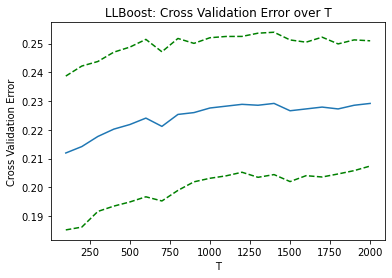

In [22]:
import matplotlib.pyplot as plt

err = [1 - logicAccs[i] for i in range(len(logicAccs))]
plt.plot(TRange, err)

above = [err[i] + logicStds[i] for i in range(len(err))]
plt.plot(TRange, above, "g--")

below = [err[i] - logicStds[i] for i in range(len(err))]
plt.plot(TRange, below, "g--")

plt.title("LLBoost: Cross Validation Error over T")
plt.xlabel("T")
plt.ylabel("Cross Validation Error")
plt.show()

In [36]:
adaScores = []
logicScores = []

# Logisitic Loss Boosting
for T in TRange:

    adaBooster = GradientBoostingClassifier(n_estimators=T, loss='exponential', learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
    adaScore = adaBooster.score(X_test, y_test)
    
    llBooster = GradientBoostingClassifier(n_estimators=T, loss='deviance', learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
    llScore = llBooster.score(X_test, y_test)
    
    # record scores
    adaScores.append(adaScore)
    logicScores.append(llScore)

    print("T=%d, Adaboost test score: %0.5f)" % (T, adaScore))
    print("T=%d, LLboost test score: %0.5f)" % (T, llScore))

T=100, Adaboost test score: 0.78352)
T=100, LLboost test score: 0.79215)
T=200, Adaboost test score: 0.79119)
T=200, LLboost test score: 0.79215)
T=300, Adaboost test score: 0.78448)
T=300, LLboost test score: 0.78831)
T=400, Adaboost test score: 0.78640)
T=400, LLboost test score: 0.78927)
T=500, Adaboost test score: 0.79023)
T=500, LLboost test score: 0.78640)
T=600, Adaboost test score: 0.78831)
T=600, LLboost test score: 0.78257)
T=700, Adaboost test score: 0.78065)
T=700, LLboost test score: 0.78257)
T=800, Adaboost test score: 0.77874)
T=800, LLboost test score: 0.77874)
T=900, Adaboost test score: 0.77778)
T=900, LLboost test score: 0.78352)
T=1000, Adaboost test score: 0.77490)
T=1000, LLboost test score: 0.78257)
T=1100, Adaboost test score: 0.77682)
T=1100, LLboost test score: 0.78352)
T=1200, Adaboost test score: 0.77586)
T=1200, LLboost test score: 0.78352)
T=1300, Adaboost test score: 0.77107)
T=1300, LLboost test score: 0.77682)
T=1400, Adaboost test score: 0.77107)
T=140

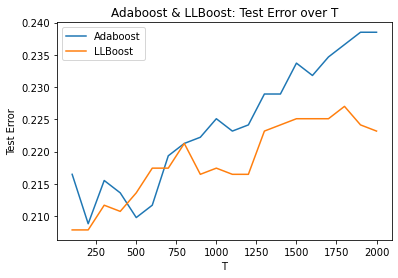

In [37]:
import matplotlib.pyplot as plt

Adaerr = [1 - adaScores[i] for i in range(len(adaScores))]
LLerr = [1 - logicScores[i] for i in range(len(logicScores))]

plt.plot(TRange, Adaerr)
plt.plot(TRange, LLerr)

plt.title("Adaboost & LLBoost: Test Error over T")
plt.xlabel("T")
plt.ylabel("Test Error")
plt.legend(["Adaboost", "LLBoost"])
plt.show()
